# Домашнее задание №6

## Задание 1

Подготовить тестовое изображение в градациях серого.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1la5yvTcFl3qNCxhBdocyJIXCNT4QH08F&export=download'
src_image = skimage.io.imread(src_image_url)
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Выполнить пороговую сегментацию изображения.

In [2]:
T = 130
thresholded_image =  cv2.threshold(gray_image, T, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]

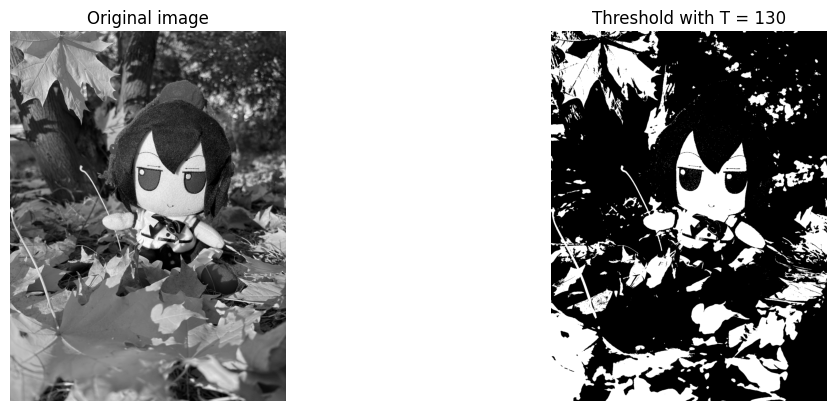

In [3]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.axis("off")
plt.title(f"Threshold with T = {T}");

## Задание 3

Выполнить двухпороговую сегментацию изображения.

In [4]:
T_1, T_2 = 80, 150

thresholded_image_1 =  cv2.threshold(gray_image, T_1, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]
thresholded_image_2 =  cv2.threshold(gray_image, T_2, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]

thresholded_image = thresholded_image_1 * 0.5 + thresholded_image_2
thresholded_image[thresholded_image > 255] = 255

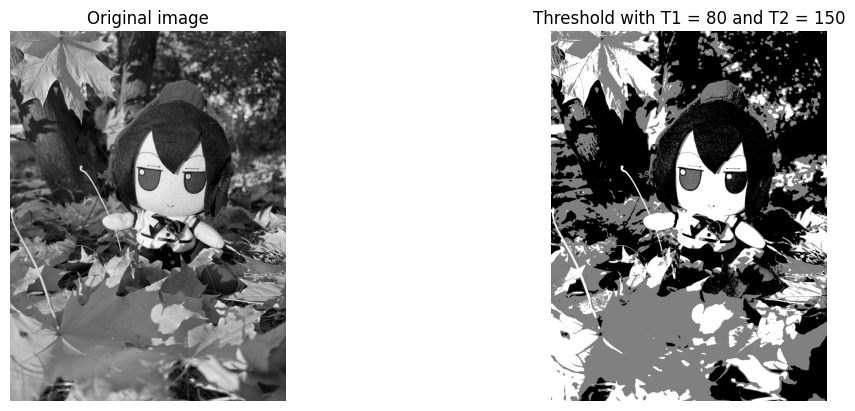

In [5]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.axis("off")
plt.title(f"Threshold with T1 = {T_1} and T2 = {T_2}");

## Задание 4

Выполнить сегментацию изображения с глобальным порогом.

In [6]:
def getting_thresh_val(img, eps = 1):
    T = int(np.mean(img))

    while True:
        G_1 = img[img > T]
        G_2 = img[img <= T]

        new_T = int((np.mean(G_1) + np.mean(G_2)) / 2)
        if abs(new_T - T) <= eps:
            break
        T = new_T

    return T

T = getting_thresh_val(gray_image)
thresholded_image =  cv2.threshold(gray_image, T, np.iinfo(np.uint8).max, cv2.THRESH_BINARY)[1]

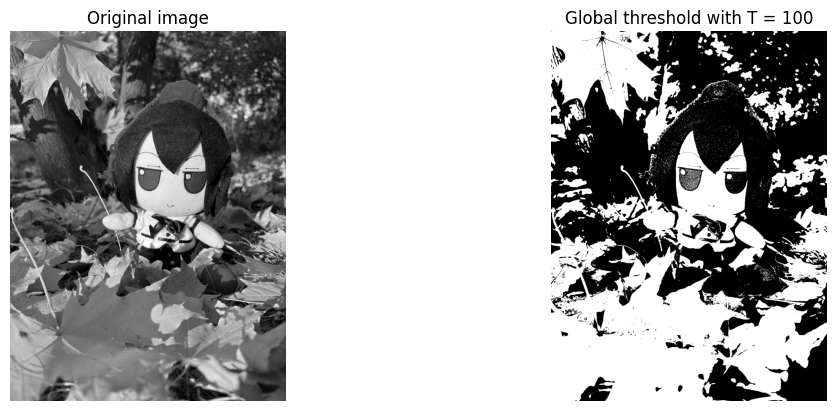

In [7]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.axis("off")
plt.title(f"Global threshold with T = {T}");

## Задание 5

Выполнить сегментацию изображения методом Оцу.

In [8]:
otsu_thresholded_image =  cv2.threshold(gray_image, np.iinfo(np.uint8).min, np.iinfo(np.uint8).max, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

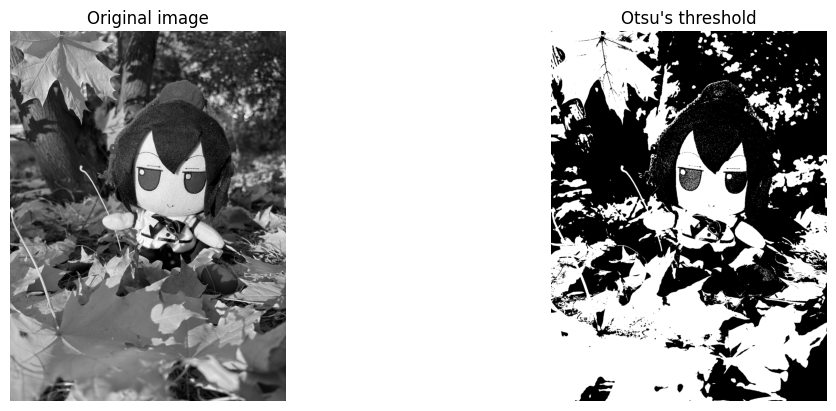

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.axis("off")
plt.title(f"Otsu's threshold");

Может показаться, что "сегментация с глобальным порогом" и метод Оцу (хотя, это тоже метод глобальной сегментации) дают один и тот же результат, однако это не так:

In [10]:
diff_between_otsu_and_global = thresholded_image - otsu_thresholded_image

# во избежание эффекта переполнения uint8
# не очень нужно при проверке на ненулевое значение
diff_between_otsu_and_global[diff_between_otsu_and_global > 0] = 255

print(f"There is a non-zero value in differenece: {np.any(diff_between_otsu_and_global)}")

There is a non-zero value in differenece: True


### Выполнил: Лежнин Максим Витальевич